%%html
<style>
table {float:left}
</style>

# Statistics

## Regression Analysis

1. [Correlation vs causation](#1)<br>
2. [The linear regression model.](#2)<br>
3. [Regression analysis practical example.](#3)<br>

In [3]:
# importing packages
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd 
import seaborn as sns
import numpy as np
import math
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
sns.set(style = 'whitegrid')
%matplotlib inline

***
## <a class="anchor" id="1">Part 1: Correlation vs causation.</a>

| Word |  | Definition |
| :- | :-: | :- |
| causation |  | Causation refers to a causal relationship between two variables. When one variable changes, the other changes accordingly. When we have causality, variable A affects variable B, but it is not required that B causes a change in A. |
| GDP |  | Gross domestic product is a monetary measure of the market value of all final goods and services produced for a specific country for a period. |

***
## <a class="anchor" id="2">Part 2: The linear regression model.</a>


| Word | Denoted | Definition |
| :- | :-: | :- |
| regression analysis |  | A statistical process for estimating relationships between variables. Usually, it is used for building predictive models. |
| linear regression model |  | A linear approximation of a causal relationship between two or more variables. |
| dependent variable ( ŷ ) |  | The variable that is going to be predicted. It also 'depends' on the other variables. Usually, denoted y. |
| independent variable ( xi ) |  | A variable that is going to predict. It is the observed data (your sample data). Usually, denoted x1, x2 to xk. |
| coefficient ( βi ) |  | A numerical or constant quantity placed before and multiplying the variable in an algebraic expression. |
| constant ( βo ) |  | This is a constant value, which does not affect any independent variable, but affects the dependent one in a constant manner. |
| epsilon ( ε ) |  | The error of prediction. Difference between the observed value and the (unobservable) true value. |
| regression equation |  | An equation, where the coefficients are estimated from the sample data. Think of it as an estimator of the linear regression model |
| b0, b1,…, bk |  | Estimates of the coefficients βo,  β1, …  βk. |
| regression line |  | The best-fitting line through the data points. |
| residual ( e ) |  | Difference between the observed value and the estimated value by the regression line. Point estimate of the error ( ε ). |
| b0 |  | The intercept of the regression line with the y-axis for a simple linear regression. |
| b1 |  | The slope of the regression line for a simple linear regression. |
| SAT |  | The SAT is a standardized test for college admission in the US. |
| GPA |  | Grade point average |
| ANOVA |  | Abbreviation of 'analysis of variance'. A statistical framework for analyzing variance of means. |
| Sum of Squares Total | SST or TSS | Sum of squares total. SST is the squared differences between the observed dependent variable and its mean. |
| Sum of Squares Regression | SSR or ESS | Sum of squares regression. SSR is the sum of the differences between the predicted value and the mean of the dependent variable. This is the variability explained by our model. |
| Sum of Squares Error | SSE or RSS | Sum of squares error. SSE is the sum of the differences between the observed value and the predicted value. This is the variability that is NOT explained by our model. |
| r-squared ( R2 ) |  | A measure ranging from 0 to 1 that shows how much of the total variability of the dataset is explained by our regression model. |
| OLS |  | An abbreviation of 'ordinary least squares'. It is a method for estimation of the regression equation coefficients. |
| regression tables |  | In this context, they refer to the tables that are going to be created after you use a software to determine your regression equation. |
| multivariate linear regression |  | Also known as multiple linear regression. There is a slight difference between the two, but are generally used interchangeably. In this course, it refers to a linear regression with more than one independent variable. |
| adjusted r-squared |  | A measure, based on the idea of R-squared, which penalizes the excessive use of independent variables. |
| F-statistic |  | The F-statistic is connected with the F-distribution in the same way the z-statistic is related to the Normal distribution. |
| F-test |  | A test for the overall significance of the model. |
| assumptions |  | When performing linear regression analysis, there are several assumptions about your data. They are known as the linear regression assumptions. |
| linearity |  | Refers to linear. |
| homoscedasticity |  | Literally means the same variance.  |
| endogeneity |  | In statistics refers to a situation, where an independent variable is correlated with the error term. |
| autocorrelation |  | When different error terms in the same model are correlated to each other. |
| multicollinearity |  | Refers to high correlation. |
| omitted variable bias |  | A bias to the error term, which is introduced when you forget to include an important variable in your model. |
| heteroscedasticity |  | Literally means a different variance. Opposite of homoscedasticity. |
| log transformation |  | A transformation of a variable(s) in your model, where you substitute that variable(s) with its logarithm. |
| semi-log model |  | One part of the model is log, the other is not. |
| log-log model |  | Both parts of the model are logarithmical. |
| serial correlation |  | Autocorrelation. |
| cross-sectional data |  | Data taken at one moment in time. |
| time series data |  | A type of panel data. Usually, time series is a sequence taken at successive, equally spaced points in time, e.g. stock prices. |
| day of the week effect |  | A well-known phenomenon in finance. Consists in disproportionately high returns on Fridays and low returns on Mondays. |


SST = SSR+SSE Total Variability of the dataset is explaine by total variability plus total unexplained variability<br>
R^2 = SSR/SST Variability explained by the regression model divided by the total variability of the dataset<br>
Standard Error = sqrt(SSE/n-2) 

In [7]:
'''
Task 1	Find how many observations was this regression ran on.
- No. Observations:	84
Task 2	What is the R-squared of this regression? What does it tell you?
- R-squared: 0.406. It tells that 40% of the total variability in GPA can be explained by SAT score.
Task 3	Determine if SAT is a statistically significant predictor of GPA.
- SAT is indeed a statistically significant predictor of GPA with p-value of .002
Task 4	What is the regression equation associated with this regression model?
- ŷ = 0.2750 + 0.0017*x1
'''
# reading in the data
df = pd.read_csv('Data/Student_Grades.csv')
# splitting x and y
X = df['SAT']
y = df['GPA']
df.head()

,GPA,SAT,"Rand 1,2,3"
0,2.40,1714,1
1,2.52,1664,3
2,2.54,1760,3
3,2.74,1685,3
4,2.83,1693,2


In [5]:
# statsmodels 
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
sm_results = model.fit().summary()
sm_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           7.20e-11
Time:                        09:54:01   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# getting the results of the second table
results_as_html = sm_results.tables[1].as_html()
sm_results_summary = pd.DataFrame(pd.read_html(results_as_html, header=0, index_col=0)[0])
sm_results_summary.sort_values(by = 'coef')

,coef,std err,t,P>|t|,[0.025,0.975]
SAT,0.0017,0.000,7.487,0.000,0.001,0.002
const,0.2750,0.409,0.673,0.503,-0.538,1.088


***
## <a class="anchor" id="3">Part 3: Regression Analysis Prectical Example.</a>

In [65]:
# read in the data
df = pd.read_csv('Data/Car_Prices.csv')
df.head()

,Brand,Price,log_price,Mileage,log_mileage,EngineV,Year
0,Mercedes-Benz,"$222,000.00",5.35,1,0.0,6.3,2016
1,Mercedes-Benz,"$177,000.00",5.25,1,0.0,5.5,2016
2,Mercedes-Benz,"$177,777.00",5.25,1,0.0,5.5,2016
3,Mercedes-Benz,"$199,999.00",5.30,1,0.0,5.5,2016
4,Mercedes-Benz,"$199,999.00",5.30,1,0.0,5.5,2016


In [66]:
# prices data preparation
df['Price'] = df['Price'].str.replace('[$,]','').astype(float)
df.head()

,Brand,Price,log_price,Mileage,log_mileage,EngineV,Year
0,Mercedes-Benz,222000.0,5.35,1,0.0,6.3,2016
1,Mercedes-Benz,177000.0,5.25,1,0.0,5.5,2016
2,Mercedes-Benz,177777.0,5.25,1,0.0,5.5,2016
3,Mercedes-Benz,199999.0,5.30,1,0.0,5.5,2016
4,Mercedes-Benz,199999.0,5.30,1,0.0,5.5,2016


In [67]:
# checking for null values
df.isna().sum()/df.shape[0]

Brand          0.0
Price          0.0
log_price      0.0
Mileage        0.0
log_mileage    0.0
EngineV        0.0
Year           0.0
dtype: float64

In [68]:
df['Brand'].value_counts()

Volkswagen       875
Mercedes-Benz    820
BMW              636
Toyota           509
Renault          438
Audi             419
Mitsubishi       306
Name: Brand, dtype: int64

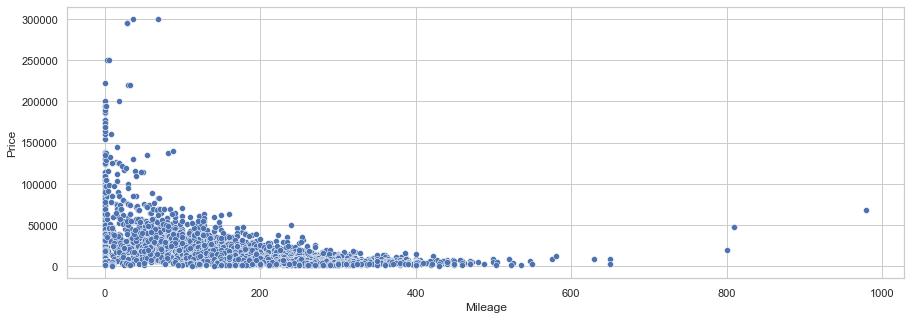

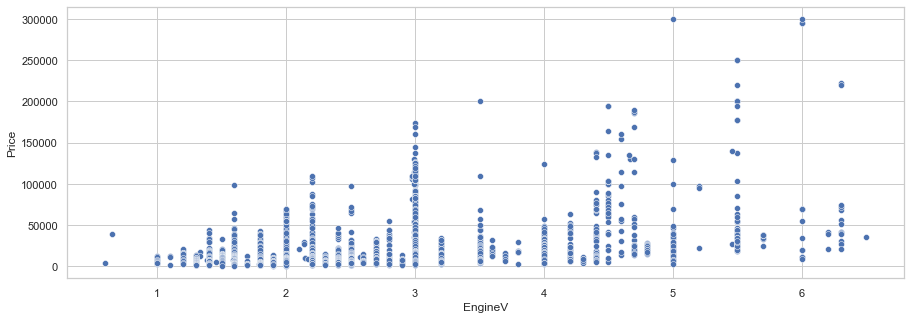

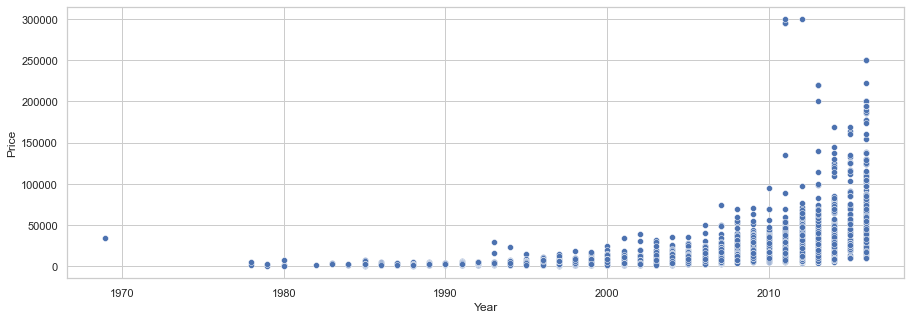

In [69]:
# plotting all columns to target variable
cols = ['Mileage','EngineV','Year']
for col in cols:
    plt.figure(figsize = (15,5))
    sns.scatterplot(data = df
                   ,x = df[col]
                   ,y = 'Price')

In [70]:
# creating dummy variables for brand
df = pd.get_dummies(df[['log_price','log_mileage','EngineV','Year','Brand']],drop_first = True)
df.head()

,log_price,log_mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,5.35,0.0,6.3,2016,0,1,0,0,0,0
1,5.25,0.0,5.5,2016,0,1,0,0,0,0
2,5.25,0.0,5.5,2016,0,1,0,0,0,0
3,5.30,0.0,5.5,2016,0,1,0,0,0,0
4,5.30,0.0,5.5,2016,0,1,0,0,0,0


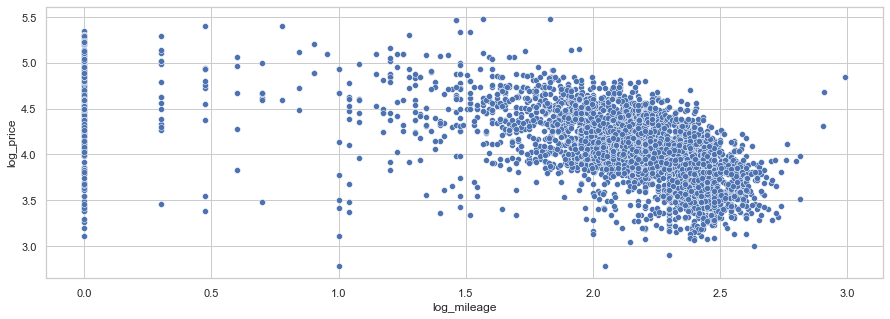

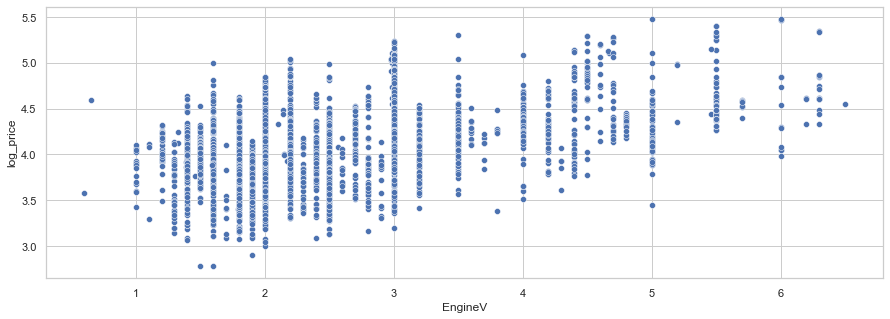

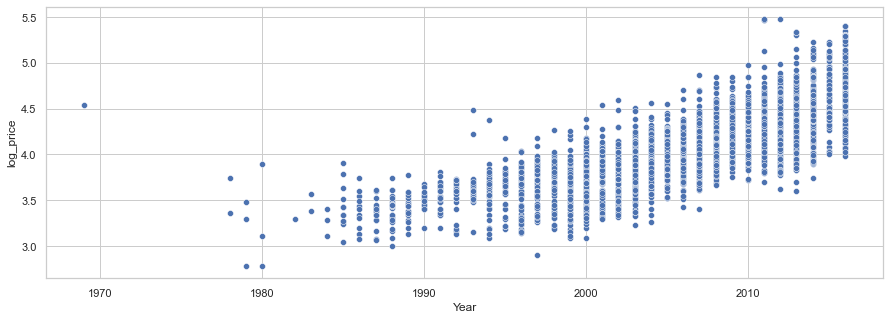

In [72]:
# logarithmic values plotting 
cols = ['log_mileage','EngineV','Year']
for col in cols:
    plt.figure(figsize = (15,5))
    sns.scatterplot(data = df
                   ,x = df[col]
                   ,y = 'log_price')

<AxesSubplot:>

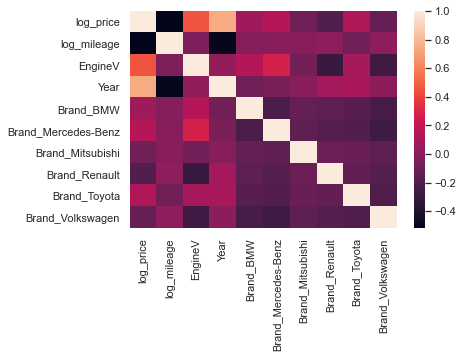

In [73]:
# checking correlations
sns.heatmap(df.corr())

In [74]:
df.columns

Index(['log_price', 'log_mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen'],
      dtype='object')

In [75]:
# creating X and y
X = df[['log_mileage','EngineV','Year', 'Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi',
       'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen']]
y = df['log_price']
X.head()

,log_mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,0.0,6.3,2016,0,1,0,0,0,0
1,0.0,5.5,2016,0,1,0,0,0,0
2,0.0,5.5,2016,0,1,0,0,0,0
3,0.0,5.5,2016,0,1,0,0,0,0
4,0.0,5.5,2016,0,1,0,0,0,0


In [77]:
#statsmodels 
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
sm_results = model.fit().summary()
sm_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1794.
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:38:50   Log-Likelihood:                 1174.0
No. Observations:                4003   AIC:                            -2328.
Df Residuals:                    3993   BIC:                            -2265.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -78.3917      1.016    -77.178      0.000     -80.383     -76.400
log_mileage            -0.1072      0.005    -20.167      0.000      -0.118      -0.097
EngineV                 0.1393      0.003     41.571      0.000       0.133       0.146
Year                    0.0411      0.001     81.435      0.000       0.040       0.042
Brand_BMW               0.0504      0.011      4.416      0.000       0.028       0.073
Brand_Mercedes-Benz     0.0458      0.011      4.183      0.000       0.024       0.067
Brand_Mitsubishi       -0.1068      0.014     -7.819      0.000      -0.134      -0.080
Brand_Renault          -0.2186      0.013    -16.973      0.000      -0.244      -0.193
Brand_Toyota           -0.0173      0.012     -1.443      0.149      -0.041       0.006
Brand_Volkswagen       -0.0581      0.011     -5.294      0.000      -0.080      -0.037
==============================================================================
Omnibus:                      408.269   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2915.273
Skew:                          -0.188   Prob(JB):                         0.00
Kurtosis:                       7.164   Cond. No.                     7.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# first table
results_as_html = sm_results.tables[0].as_html()
results_as_html_summary = pd.DataFrame(pd.read_html(results_as_html, header = 0, index_col = 0)[0])
results_as_html_summary 

,log_price,R-squared:,0.802
Dep. Variable:,,,
Model:,OLS,Adj. R-squared:,0.801
Method:,Least Squares,F-statistic:,1794.000
Date:,"Thu, 22 Apr 2021",Prob (F-statistic):,0.000
Time:,10:38:50,Log-Likelihood:,1174.000
No. Observations:,4003,AIC:,-2328.000
Df Residuals:,3993,BIC:,-2265.000
Df Model:,9,NaN,NaN
Covariance Type:,nonrobust,NaN,NaN


In [79]:
# second table
results_as_html = sm_results.tables[1].as_html()
sm_results_summary = pd.DataFrame(pd.read_html(results_as_html, header=0, index_col=0)[0])
sm_results_summary.sort_values(by = 'coef')

,coef,std err,t,P>|t|,[0.025,0.975]
const,-78.3917,1.016,-77.178,0.000,-80.383,-76.400
Brand_Renault,-0.2186,0.013,-16.973,0.000,-0.244,-0.193
log_mileage,-0.1072,0.005,-20.167,0.000,-0.118,-0.097
Brand_Mitsubishi,-0.1068,0.014,-7.819,0.000,-0.134,-0.080
Brand_Volkswagen,-0.0581,0.011,-5.294,0.000,-0.080,-0.037
Brand_Toyota,-0.0173,0.012,-1.443,0.149,-0.041,0.006
Year,0.0411,0.001,81.435,0.000,0.040,0.042
Brand_Mercedes-Benz,0.0458,0.011,4.183,0.000,0.024,0.067
Brand_BMW,0.0504,0.011,4.416,0.000,0.028,0.073
EngineV,0.1393,0.003,41.571,0.000,0.133,0.146
